In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.af as af
import mlgrad.cluster as cluster
import mlgrad.funcs as funcs

from mlgrad.inventory import modified_zscore

In [3]:
df = pd.read_csv("../data/starsCYG.csv", sep=',', index_col='id')

X = log_Te = df["log.Te"].values
Xs = X[:,None]

Y = log_light = df["log.light"].values

XY = df.values

xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()

N = len(X)
print((N-7)/N)
alpha = 0.84

0.851063829787234


In [4]:
def get_range(a, q=2):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(XY[:,0])
ymin, ymax = get_range(XY[:,1])
print((ymax-ymin)/(xmax-xmin))
XX1, XX2 = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XX = np.c_[(XX1.ravel(), XX2.ravel())]

2.06140350877193


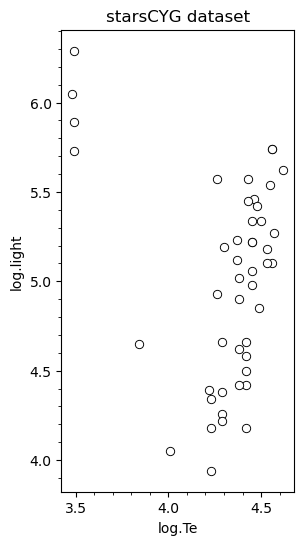

In [5]:
plt.figure(figsize=(3,6))
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.minorticks_on()
plt.title("starsCYG dataset")
plt.show()

In [6]:
km1 = cluster.KMeansMahalanobis(1)
km1.fit(XY)

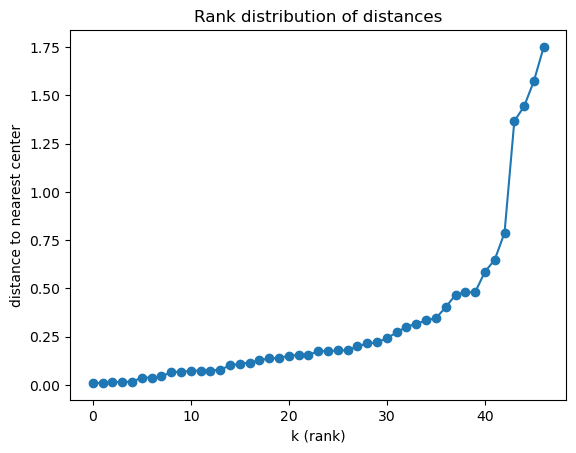

In [7]:
D = km1.eval_dists(XY)
D.sort()
plt.plot(D, marker='o')
plt.ylabel("distance to nearest center")
plt.xlabel("k (rank)")
plt.title("Rank distribution of distances")
plt.show()

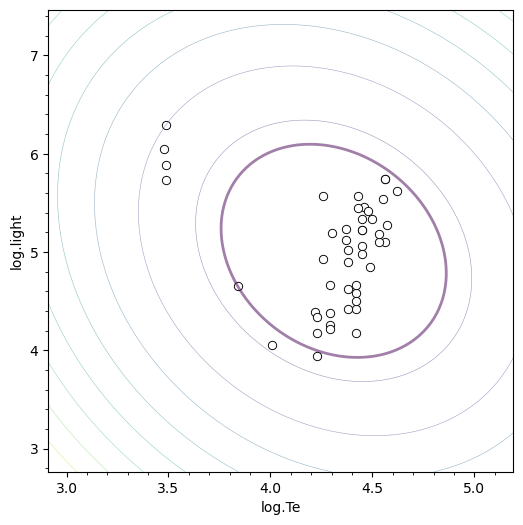

In [8]:
r = D[-7]

plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.minorticks_on()

Z = km1.eval_dists(XX)
ZZ = Z.reshape(XX1.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 10), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.4, alpha=0.5)
plt.contour(ZZ, levels=[r], 
            extent=(xmin,xmax,ymin,ymax), linewidths=2.0, alpha=0.5)
plt.show()

In [9]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.85, 0.001))
km2 = cluster.RKMeansMahalanobis(1, wma)
km2.fit(XY)

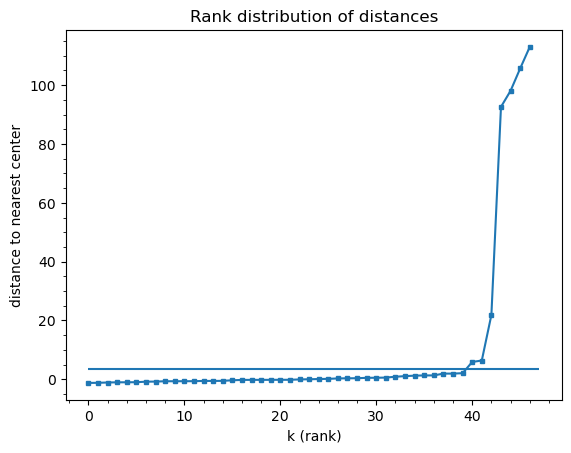

In [11]:
D2 = km2.eval_dists(XY)
Z2 = modified_zscore(D2)
Z2.sort()
plt.title("Rank distribution of distances")
plt.plot(Z2, marker='s', markersize=3)
plt.hlines(3.5, 0, len(XY))
plt.ylabel("distance to nearest center")
plt.xlabel("k (rank)")
plt.minorticks_on()
plt.show()

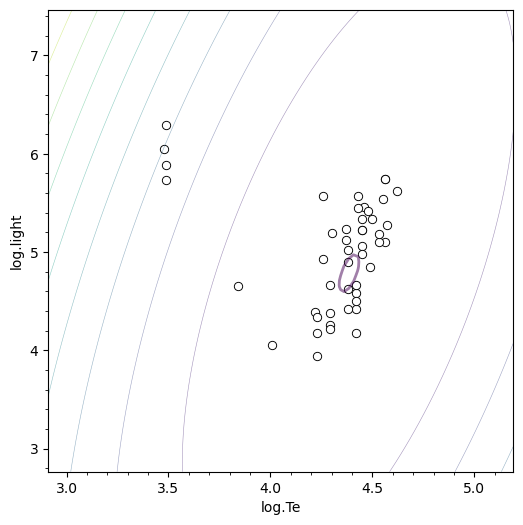

In [12]:
r = D2[-7]

plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.minorticks_on()

Z = km2.eval_dists(XX)
ZZ = Z.reshape(XX1.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 10), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.4, alpha=0.5)
plt.contour(ZZ, levels=[r], 
            extent=(xmin,xmax,ymin,ymax), linewidths=2.0, alpha=0.5)
plt.show()